# MAC0460/MAC5832 (2020)
## EP1 -- Perceptron: toy example

Seja um conjunto de treinamento $X = \{ (\mathbf{x}^{(1)},y^{(1)}), (\mathbf{x}^{(2)},y^{(2)}), \ldots, (\mathbf{x}^{(N)},y^{(N)})\}$, $\mathbf{x}^{(i)} \in \mathbb{R}^d$ e $y^{(i)} \in \{-1, +1\}$, $i=1,2,\ldots,N$, linearmente separáveis. Dado $\mathbf{x} = (x_1, \ldots, x_d)  \in \mathbb{R}^d$, seja $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$.

O perceptron determina um vetor de pesos $\mathbf{w} \in \mathbb{R}^{1+d}$ de tal forma que $\mathrm{sign}(\mathbf{w}^T \tilde{\mathbf{x}}^{(i)}) = y^{(i)}$, $\forall i$, na qual 
$$
sign(z) = \left\{\begin{array}{ll}+1, & \mbox{se $z \geq 0$,}\\ -1, & \mbox{se $z < 0$.}\\
\end{array}\right.
$$

O objetivo deste EP é implementar o algoritmo perceptron para dados em $\mathbb{R}^2$ e testá-lo em casos com poucos exemplos. 


### 1. Gerar os pontos e uma target function
- o dataset consistirá de alguns ($N$) pontos definidos a mão. Alungs desses pontos serão os vértices do quadrado $[0,1]\times[0,1]$
- definiremos uma reta $f(x_1,x_2) = w_0 + w_1\,x_1 + w_2\,x_2$ que corta o quadrado $[0,1]\times [0,1]$
- aqui vamos plotar esses pontos de tal forma que os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) \geq 0$ (<font color="blue">positivo</font>) são plotados em <font color="blue">azul</font> e os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) < 0$ (<font color="red">negativo</font>) são plotados em <font color="red">vermelho</font>
- a classe de cada um dos $N$ pontos será portanto dado pelo sinal de $f$ 

Shape of array X:  (5, 2)
Number of examples:  5
Shape of array Xe:  (5, 3)
[[ 1.   1.3 -0.2]
 [ 1.   0.   0. ]
 [ 1.   0.   1. ]
 [ 1.   1.   0. ]
 [ 1.   1.   1. ]]
Target weight array:  [ 0.5 -1.   1. ]
Shape of array y:  (5,)
[-1.  1.  1. -1.  1.]
['red', 'blue', 'blue', 'red', 'blue']


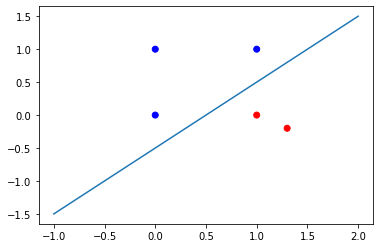

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.asarray([[1.3, -0.2],[0,0],[0,1],[1,0],[1,1]])
print("Shape of array X: ", X.shape)
N = X.shape[0]
print("Number of examples: ", N)

# add a left column with 1's into X -- X extended
Xe = np.hstack(( np.ones((X.shape[0],1)), X ) )
print("Shape of array Xe: ", Xe.shape)
print(Xe)

# define a target weight vector
w_target = np.asarray([0.5, -1, 1])
print("Target weight array: ", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)
print(y)

# Plotting ...

# plot the line
a = -w_target[1] / w_target[2] # slope  -- we will have trouble if w_target[2]=0 ...
b = -w_target[0] / w_target[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

# Determine the colors of each of the examples
colors = ["blue" if y[i]==1 else "red" for i in range(N)]
print(colors)

# plot the examples
plt.scatter(X[:,0],X[:,1],c=colors);



### Chutar uma hipótese inicial

Escolha de cores: <font color="blue">positivo</font> e <font color="red">negativo</font>  
Formato do marcador:
- o : classificados corretamente pela hipótese<br>
- x : classificados incorretamente pela hipótese<br>


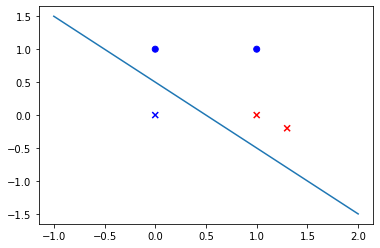

In [2]:
# Dada uma hipótese qualquer, se o sinal coincidir com o original,
# desenha-se bola, se não coincidir, desenha-se x. A cor identifica
# a classificação correta (ground-truth)

# vetor de pesos inicial
w0 = np.asarray([-0.5, 1 , 1])

# calcular yhat
yhat = np.sign(np.dot(Xe,w0))

# misclassifications
misclassified = np.where(y != yhat)[0] 
correct = np.where(y == yhat)[0]

colors_o = ["blue" if y[i]==1 else "red" for i in correct]
colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]


# plotting
a = -w0[1] / w0[2] # slope
b = -w0[0] / w0[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');

# O algoritmo perceptron

In [3]:
def perceptron(Xe,y,w0):
    
    """
    Parameters:
       Xe : ndarray (N,d+1) - it already has the 1's in column 1
       y  : ndarray (N,)
       w0 : ndarray (d+1,) - the initial weight vector
       
    Returns:
       w : ndarray (d+1,) - the final weight vector
    """
    
    # Initialization
    w = w0.copy() 
    yhat = np.sign(np.dot(Xe,w0)) # the output yhat is a "classification" list e.g. (1,-1,1,1,-1...)
    misclassified = np.where(y != yhat)[0] #returns a list with the indices e.g. (2,4), that is, the 2nd and 4th points are missclassified
    
    while(len(misclassified) > 0):

        point = np.random.choice(misclassified)
        
        w = w + y[point]*Xe[point] # updates the weights
        yhat = np.sign(np.dot(Xe,w)) # updates the classifications
        
        misclassified = np.where(y != yhat)[0]
        
    return w
  
def perceptron_plot(Xe,y,w):
    
    # colors matching the classification
    colors = ["blue" if y[i]==1 else "red" for i in range(len(y))]

    # horizontal and vertical coordiantes
    x1 = Xe[range(len(y)),1]
    x2 = Xe[range(len(y)),2]
    
    # plotting
    a = -w[1] / w[2] # slope
    b = -w[0] / w[2] # intercept
    x_l = np.linspace(min(x1), max(x1), 50) # adjusts the domain s.t. it fits all the points
    y_l = a*x_l + b # line
    plt.plot(x_l, y_l);

    plt.scatter(x1, x2, c=colors, marker='o');

# test your function for w0, X and y as defined above
# Print the final weight vector and plot both the examples and
# the separating line



Vetor final wf: [ 0.5 -1.3  2.2]


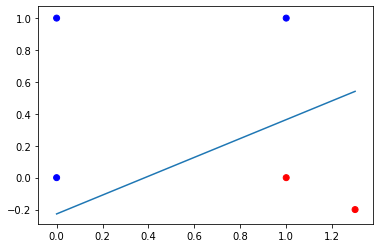

In [4]:
wf = perceptron(Xe,y,w0) #final weights
print("Vetor final wf:", wf)
perceptron_plot(Xe,y,wf) #plots te points

# Animação

Mostra cada passo do algoritmo. A reta pode não aparecer em alguns dos frames devido aos limites definidos

In [5]:
import matplotlib.pyplot as plt
import imageio

def perceptron_animate(Xe,y,w0,file_name):
    
    # Initialization
    w = w0.copy() 
    yhat = np.sign(np.dot(Xe,w0)) 
    misclassified = np.where(y != yhat)[0]
    
    #Plot range
    offset = 0.1
    xmax = max(Xe[range(len(y)),1]) + offset
    xmin = min(Xe[range(len(y)),1]) - offset
    ymax = max(Xe[range(len(y)),2]) + offset
    ymin = min(Xe[range(len(y)),2]) - offset
    
    #Frame list ims
    ims = []
    fig, ax = plt.subplots()   
    
    while(len(misclassified) > 0):

        point = np.random.choice(misclassified)
        
        w = w + y[point]*Xe[point] 
        yhat = np.sign(np.dot(Xe,w)) 
        
        misclassified = np.where(y != yhat)[0]
        correct = np.where(y == yhat)[0]

        colors_o = ["blue" if y[i]==1 else "red" for i in correct]
        colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]
        
        # Clear the axis, otherwise the images overlap, and sets the range
        plt.cla()
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)   
        
        x_l = np.linspace(xmin, xmax, 50)
        y_l = - w[1] / w[2] *x_l - w[0] / w[2]
        ax.plot(x_l, y_l);
        
        ax.scatter(Xe[correct,1],Xe[correct,2],c=colors_o, marker='o');
        ax.scatter(Xe[misclassified,1],Xe[misclassified,2],c=colors_x, marker='x');
        
        fig.canvas.draw()  # draw the canvas, cache the renderer      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        ims.append(image) #appends the frame to the ftame list ims
    
    # Saves the gif file with the animation as the file algorithm.gif
    imageio.mimsave(file_name, ims, fps=1)
    
    # Plots the final step
    plt.show()

Salva a animação do primeiro exemplo como o arquivo "animacao_1.gif"

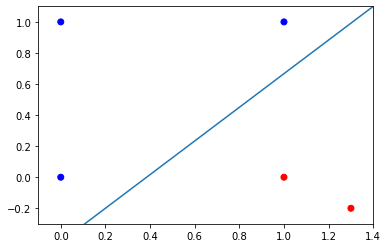

In [6]:
perceptron_animate(Xe,y,w0,'./animacao_1.gif')

# Geração de pontos e vetor peso aleatório

Gera novos pontos a partir de um vetor target e também um vetor de pesos aleatórios.

i) Primeiro geramos o peso inicial

In [16]:
w0_random = np.random.uniform(-1,1,3) # Creates a vector of length 3 with random numbers betwenn -1 and 1
print("Vetor peso inicial:", w0_random)

Vetor peso inicial: [0.4694073  0.26371569 0.78946067]


ii) Em seguida geramos os novos pontos em posições aleatórias, na região $R = [-1, 1] \times [-1, 1]$

In [17]:
N_points = 50
Xrandom = np.random.uniform(-1,1,(N_points,2)) # A random matrix with dimensions N_points x 2. Basically N_points in the xy plane
Xrandom = np.hstack(( np.ones((Xrandom.shape[0],1)), Xrandom ) ) # Adds a column of 1's in the matrix above

iii) Geramos então um vetor peso $w_{Target}$ que fará a divisão arbitrária desses pontos (executar esta célula novamente, caso os pontos sejam todos gerados com a mesma classificação, já que isto é feito de maneira aleatória)

In [18]:
# Generates two random points in the region R = [-1,1] x [-1,1]
x1 = np.random.uniform(-1,1)
x2 = np.random.uniform(-1,1)
y1 = np.random.uniform(-1,1)
y2 = np.random.uniform(-1,1)

#Finds the line that passes through these points
m = (x2 - x1)/(y2 - y1)
b = y1 - m * x1

#Finds the target vector w_target associated with this line, since y = mx + b -> 1 + m/b * x - 1/b * y = 0 -> w = (1, m/b, -1/b) 
w_target_random = (1, m/b, -1/b)
y_random = np.sign(np.dot(Xrandom, w_target_random))

iv) Finalmente plotamos o resultado final, com o vetor $w_f$ encontrado

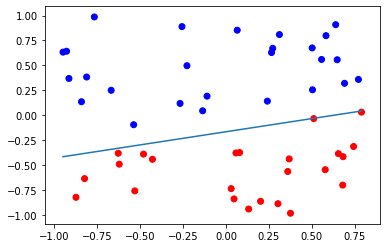

In [19]:
wf_random = perceptron(Xrandom,y_random,w0_random)

perceptron_plot(Xrandom,y_random,wf_random)

v) Por fim, animamos a execução do Perceptron dado o exemplo aleatória acima. Salvamos a animação como o arquivo "animacao_aleatoria.gif". Pode levar alguns segundos, dependendo do tempo de convergência

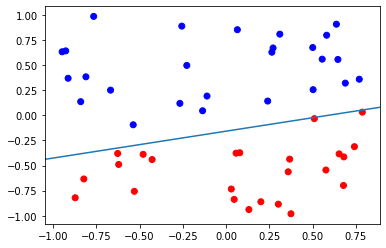

In [20]:
perceptron_animate(Xrandom,y_random,w0_random,'./animacao_aleatoria.gif')

# Extensão para o caso tridimensional

A função 'perceptron' que retorna o vetor final $w_f$ que definimos no início funciona para um número arbitrário de dimensões, contudo, aqui faremos gráficos para o caso tridimensional

In [12]:
w0_random = np.random.uniform(-1,1,4) # This time the weight vector has 3 + 1 = 4 dimensions
print("Vetor peso inicial:", w0_random)
N_points = 10
Xrandom = np.random.uniform(-1,1,(N_points,3)) # Here we also increase the number of columns from the matrix to 3
Xrandom = np.hstack(( np.ones((Xrandom.shape[0],1)), Xrandom ) )
w_target_random = np.random.uniform(-1,1,4)
y_random = np.sign(np.dot(Xrandom, w_target_random))

Vetor peso inicial: [ 0.12153747  0.82027092  0.51782138 -0.79791473]


Aqui plotamos o vetor peso final $w_f$

In [13]:
wf_random = perceptron(Xrandom,y_random,w0_random)
print("Vetor peso final:", wf_random)

Vetor peso final: [0.12153747 0.716005   1.31432629 1.70740715]


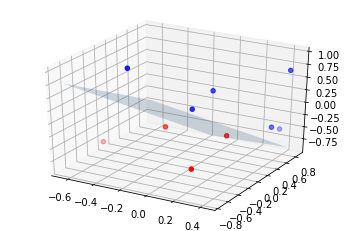

In [14]:
from mpl_toolkits.mplot3d import Axes3D

def perceptron_plot_3D(Xe,y,w):
    
    # colors matching the classification
    colors = ["blue" if y[i]==1 else "red" for i in range(len(y))]

    # coordiantes
    x1 = Xe[range(len(y)),1]
    x2 = Xe[range(len(y)),2]
    x3 = Xe[range(len(y)),3]
    
    a = -w[0] / w[3] # slope
    b = -w[1] / w[3] # intercept
    c = -w[2] / w[3] # intercept
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = np.linspace(min(x1),max(x1),10)
    y = np.linspace(min(x2),max(x2),10)

    x_l,y_l = np.meshgrid(x,y)
    ax.plot_surface(x_l, y_l, a + b * x_l + c * y_l, alpha=0.2)

    ax.scatter(x1, x2, x3, c=colors, marker='o');
    
perceptron_plot_3D(Xrandom,y_random,wf_random)